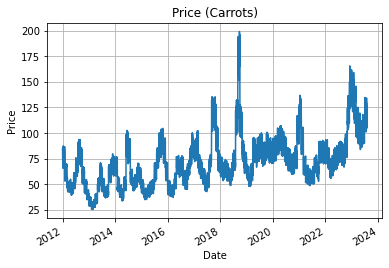

,Price
Date,
2023-07-27,104.99
2023-07-28,126.75
2023-07-29,112.11
2023-07-30,104.62
2023-07-31,106.93


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#--------Data manipulation-----------#

df = pd.read_excel('Carrots.xlsx')


#setting index
df.set_index(pd.Index(['Month','Day','Price']), inplace=True)

#transpose horizontal to vertical
df = df.T

#reset the index
df.reset_index(inplace=True)

df.rename(columns={'index': 'Year'}, inplace=True)

df['Year'].replace(r'^Unnamed.*', pd.NA, regex=True, inplace=True)
df['Year'].fillna(method='ffill', inplace=True)
df['Month'].fillna(method='ffill', inplace=True)


df['Day'] = df['Day'].astype(int)
df['Date'] = df['Year'].astype(str) + ' ' + df['Month'].astype(str) + ' ' + df['Day'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y %B %d')
df.set_index('Date', inplace=True)

#drops the column
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

df['Price'] = df['Price'].astype(float)
ts = pd.Series(data=df['Price'])

#ploting
ts.plot(title='Price (Carrots)', xlabel='Date', ylabel='Price')
plt.autoscale()
plt.grid(which='both')
plt.show()

ts
df.tail()

In [122]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(ts)

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check if the p-value is less than the significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis; Time series is stationary")
else:
    print("Fail to reject the null hypothesis; Time series is non-stationary")


ADF Statistic: -3.5621037573020162
p-value: 0.0065282485211255094
Reject the null hypothesis; Time series is stationary


ADF Statistic after differencing: -33.91388046403879
p-value after differencing: 0.0


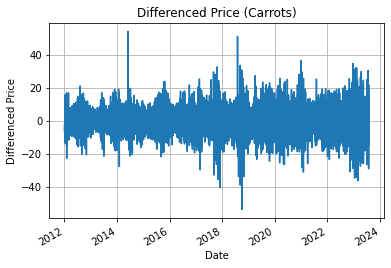

In [123]:
# First-order difference
ts_diff = ts.diff().dropna()

# Check stationarity again
result_diff = adfuller(ts_diff)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

# Plot differenced time series
ts_diff.plot(title='Differenced Price (Carrots)', xlabel='Date', ylabel='Differenced Price')
plt.autoscale()
plt.grid(which='both')
plt.show()


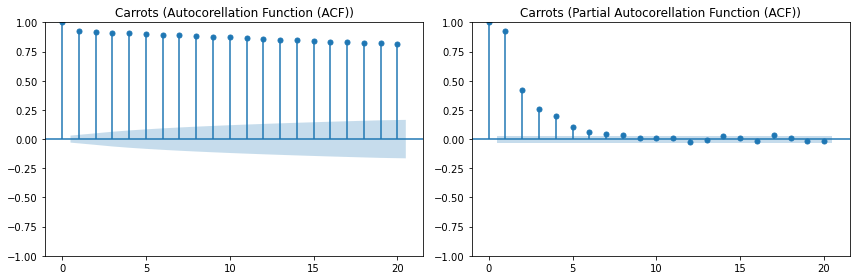

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF
plot_acf(ts, lags=20, ax=ax1)
ax1.set_title('Carrots (Autocorellation Function (ACF))')

# PACF
plot_pacf(ts, lags=20, ax=ax2)
ax2.set_title('Carrots (Partial Autocorellation Function (ACF))')

plt.tight_layout()
plt.show()


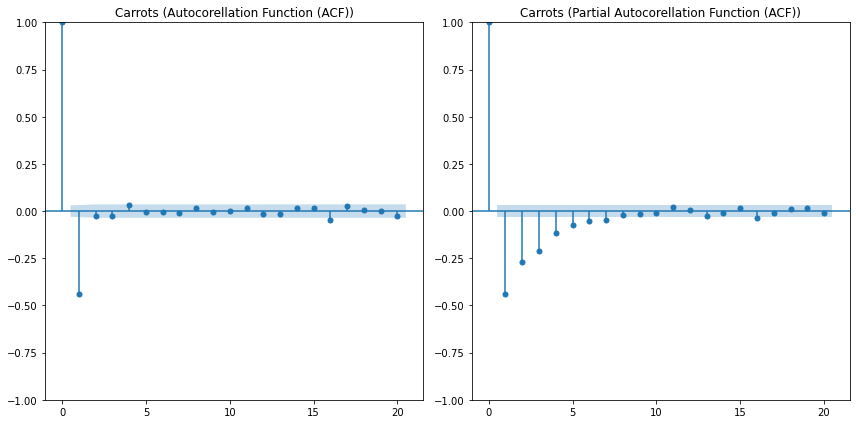

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Differencing the time series
ts_diff = ts.diff().dropna()

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(ts_diff, lags=20, ax=plt.gca())
plt.title('Carrots (Autocorellation Function (ACF))')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(ts_diff, lags=20, ax=plt.gca())
plt.title('Carrots (Partial Autocorellation Function (ACF))')

plt.tight_layout()
plt.show()


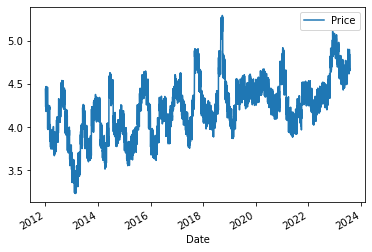

In [126]:
import numpy as np
df= np.log(df)
df.plot()

df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)  # Make sure the index is sorted

# Set frequency explicitly
df = df.asfreq('D')


## Monthly

In [127]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Set frequency explicitly
df_monthly.index.freq = 'M'

# Fit the ARIMA model (replace with your chosen order)
order = (49,1,49)  # Example order, you may need to adjust this based on your data and analysis
model = sm.tsa.ARIMA(df_monthly['Price'], order=order)
results = model.fit()

# Forecast future values (replace steps with the number of steps you want to forecast)
forecast_steps = 12  # Assuming you want to forecast 12 months (1 year)
forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values, confidence intervals, and dates
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_dates = predicted_values.index

# Convert log-transformed values back to original scale
forecasted_values_original_scale = np.exp(predicted_values)

# Extract forecasted values as a list
forecasted_values_list = forecasted_values_original_scale.tolist()

print('Forecasted Values')
# Print the list of forecasted values with dates
for date, value in zip(forecast_dates, forecasted_values_list):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

mse = mean_squared_error(df_monthly['Price'], results.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_monthly['Price'], results.fittedvalues)
mape = np.mean(np.abs((df_monthly['Price'] - results.fittedvalues) / df_monthly['Price'])) * 100

print()
print('Error Metrics')
# Print the metrics as percentages
print(f'MSE: {mse:.2%}')
print(f'RMSE: {rmse:.2%}')
print(f'MAE: {mae:.2%}')
print(f'MAPE: {mape:.2f}%')

residuals = results.resid


Forecasted Values
2023-08-31: 89.52
2023-09-30: 82.79
2023-10-31: 90.88
2023-11-30: 112.99
2023-12-31: 117.99
2024-01-31: 103.73
2024-02-29: 110.92
2024-03-31: 100.99
2024-04-30: 85.61
2024-05-31: 80.30
2024-06-30: 72.04
2024-07-31: 82.33

Error Metrics
MSE: 14.63%
RMSE: 38.25%
MAE: 11.25%
MAPE: 2.67%


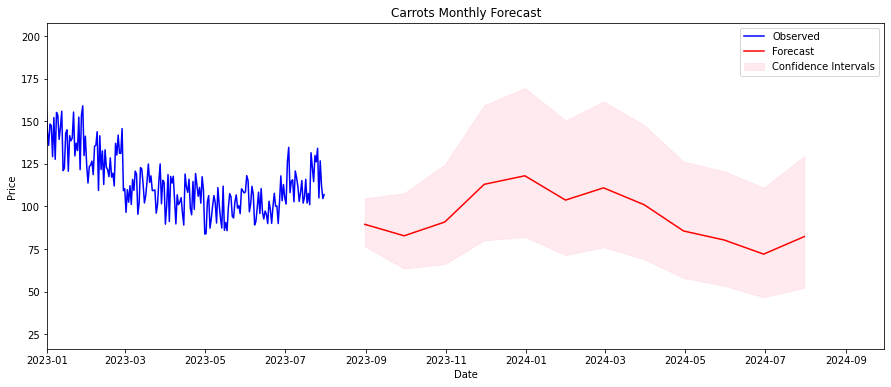

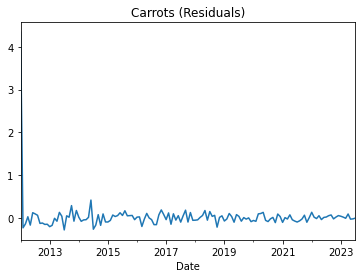

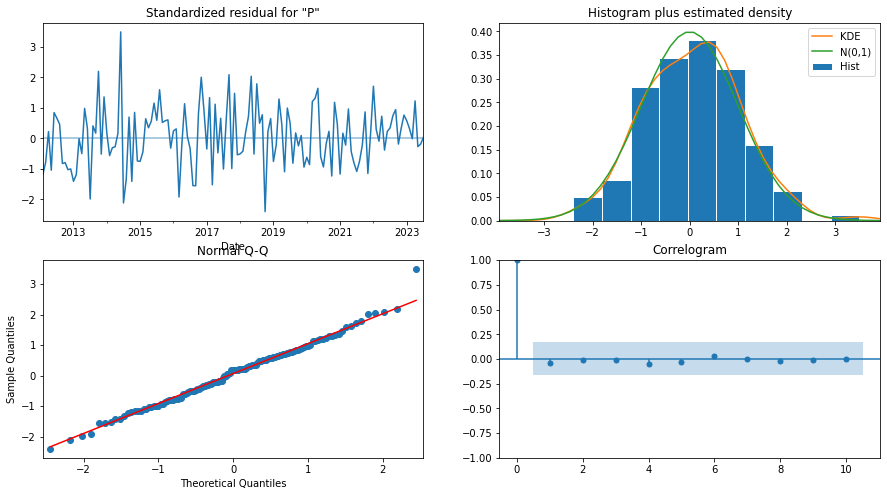

count    139.000000
mean       0.034920
std        0.382329
min       -0.272433
25%       -0.065321
50%        0.015699
75%        0.066239
max        4.337666
dtype: float64
Mean of Residuals: 0.0349198004387799


In [128]:
import matplotlib.pyplot as plt

# Plot the observed values

plt.figure(figsize=(15, 6))

plt.plot(ts, label='Observed', color='blue')

# Plot the forecasted values
plt.plot(predicted_values.index, forecasted_values_original_scale, label='Forecast', color='red')

# Add confidence intervals
confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, np.exp(confidence_intervals.iloc[:, 0]), np.exp(confidence_intervals.iloc[:, 1]), color='pink', alpha=0.3, label='Confidence Intervals')

#Carrots Monthly Forecast plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Carrots Monthly Forecast')
plt.xlim(pd.Timestamp('2023-01-01'), ts.index[-1] + pd.DateOffset(months=14))  # Increase x-axis limits

plt.show()

residuals.plot(title="Carrots (Residuals)")
plt.show()

results.plot_diagnostics(figsize=(15, 8))
plt.show()

print(residuals.describe())

print(f"Mean of Residuals: {results.resid.mean()}")

In [129]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  139
Model:               ARIMA(49, 1, 49)   Log Likelihood                 125.788
Date:                Tue, 12 Dec 2023   AIC                            -53.577
Time:                        01:54:01   BIC                            236.221
Sample:                    01-31-2012   HQIC                            64.190
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0752     71.284      0.001      0.999    -139.640     139.790
ar.L2         -0.3922     52.791     -0.007      0.994    -103.860     103.076
ar.L3         -0.1228     61.058     -0.002      0.9

## Weekly 

In [130]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Resample the data to weekly frequency and calculate the mean
df_weekly = df.resample('W').mean()

# Set frequency explicitly
df_weekly.index.freq = 'W'

df_weekly = df_weekly.fillna(method='ffill')

# Fit the ARIMA model (replace with your chosen order)
order = (49,1,49)  # Example order, you may need to adjust this based on your data and analysis
model = sm.tsa.ARIMA(df_weekly['Price'], order=order)
results = model.fit()

# Forecast future values (replace steps with the number of steps you want to forecast)
forecast_steps = 6  # Assuming you want to forecast 12 weeks (3 months)

forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values, confidence intervals, and dates
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_dates = forecast.predicted_mean.index

# Convert log-transformed values back to the original scale
forecasted_values_original_scale = np.exp(predicted_values)

# Extract forecasted values as a list
forecasted_values_list = forecasted_values_original_scale.tolist()

print('Forecasted Values (Weekly Frequency)')
# Print the list of forecasted values with dates
for date, value in zip(forecast_dates, forecasted_values_list):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

mse = mean_squared_error(df_weekly['Price'], results.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_weekly['Price'], results.fittedvalues)
mape = np.mean(np.abs((df_weekly['Price'] - results.fittedvalues) / df_weekly['Price'])) * 100

print()
print('Error Metrics')
# Print the metrics as percentages
print(f'MSE: {mse:.2%}')
print(f'RMSE: {rmse:.2%}')
print(f'MAE: {mae:.2%}')
print(f'MAPE: {mape:.2f}%')

residuals = results.resid


Forecasted Values (Weekly Frequency)
2023-08-13: 104.98
2023-08-20: 102.84
2023-08-27: 103.04
2023-09-03: 104.66
2023-09-10: 102.97
2023-09-17: 104.97

Error Metrics
MSE: 3.69%
RMSE: 19.21%
MAE: 5.63%
MAPE: 1.33%


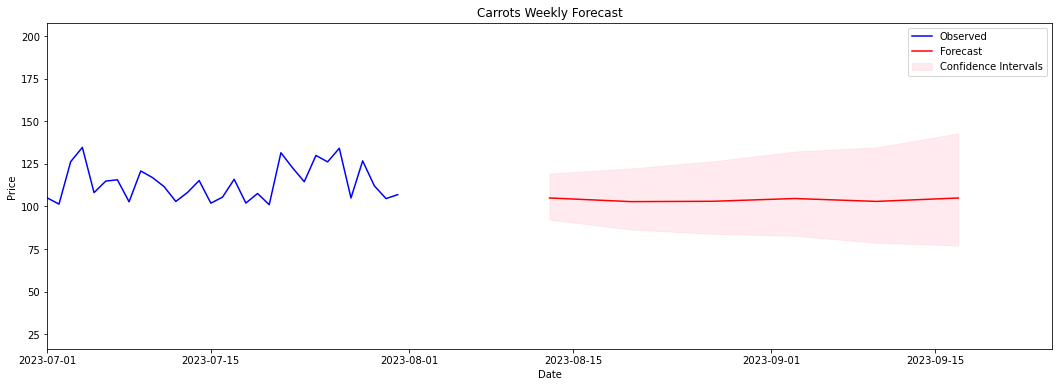

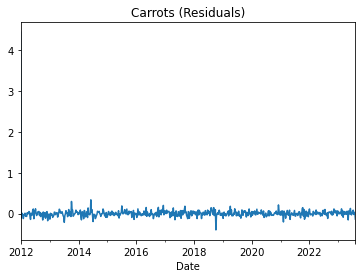

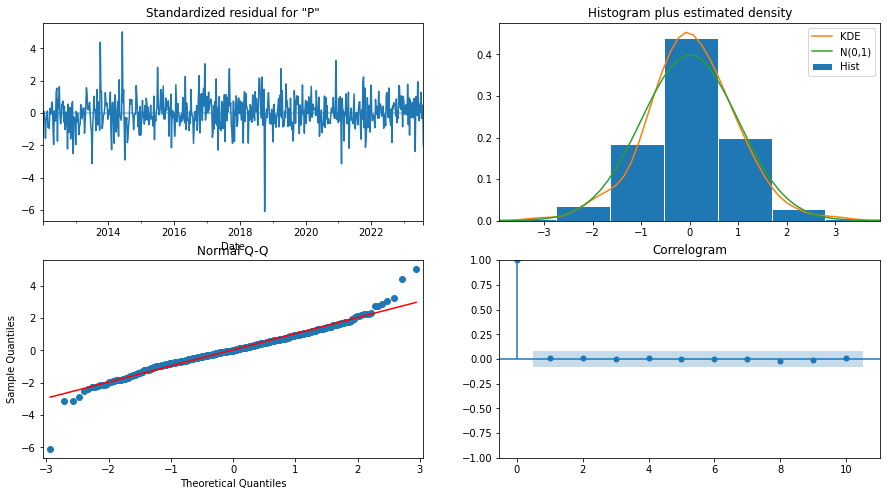

count    606.000000
mean       0.009346
std        0.192052
min       -0.399156
25%       -0.035749
50%       -0.000153
75%        0.041422
max        4.437934
dtype: float64
Mean of Residuals: 0.009346274894587295


In [131]:
import matplotlib.pyplot as plt

# Plot the observed values
plt.figure(figsize=(18, 6))  # Increase the figure size

# Plot the observed values
plt.plot(ts, label='Observed', color='blue')

# Plot the forecasted values
plt.plot(predicted_values.index, forecasted_values_original_scale, label='Forecast', color='red')

# Add confidence intervals
confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, np.exp(confidence_intervals.iloc[:, 0]), np.exp(confidence_intervals.iloc[:, 1]), color='pink', alpha=0.3, label='Confidence Intervals')

# Carrots Weekly Forecast plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Set x-axis limits to start from July 2023
plt.xlim(pd.Timestamp('2023-07-01'), ts.index[-1] + pd.DateOffset(weeks=8))  # Increase x-axis limits

# Adjust y-axis limits if needed
#plt.ylim(0, max(ts.max(), forecasted_values_original_scale.max()) * 1.2)

plt.title('Carrots Weekly Forecast')
plt.show()

residuals.plot(title="Carrots (Residuals)")
plt.show()

results.plot_diagnostics(figsize=(15, 8))
plt.show()

print(residuals.describe())

print(f"Mean of Residuals: {results.resid.mean()}")


In [132]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  606
Model:               ARIMA(49, 1, 49)   Log Likelihood                 782.127
Date:                Tue, 12 Dec 2023   AIC                          -1366.254
Time:                        01:57:22   BIC                           -930.137
Sample:                    01-01-2012   HQIC                         -1196.546
                         - 08-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1263      1.419     -0.089      0.929      -2.907       2.655
ar.L2          0.0035      1.197      0.003      0.998      -2.343       2.350
ar.L3          0.1534      1.013      0.151      0.8

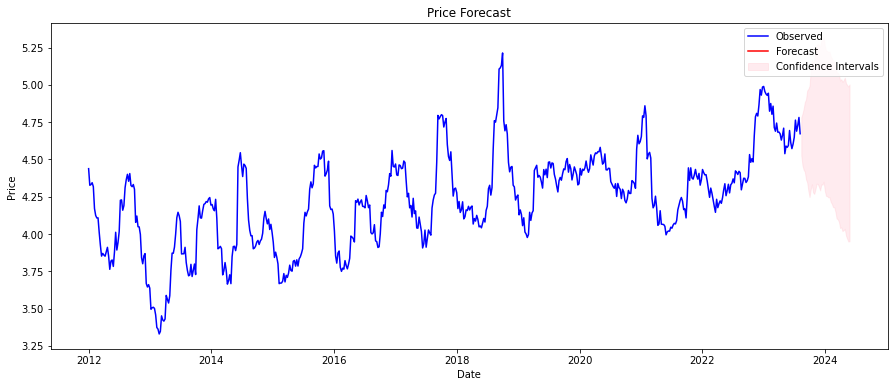

In [20]:
import matplotlib.pyplot as plt

# Assuming df_weekly is your DataFrame and results is the fitted ARIMA model

# Plot the observed values
plt.figure(figsize=(15, 6))
plt.plot(df_weekly['Price'], label='Observed', color='blue')

# Specify the start date for the forecast
df['forecast']=results.predict(start='2023-08-13',end='2023-09-17',dynamic=True)

plt.plot(df['forecast'], label='Forecast', color='red')

# Add confidence intervals
confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Price Forecast')

plt.show()


In [118]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Set frequency explicitly
df_monthly.index.freq = 'M'

# Set up parameters
order = (49,1,49)  # Example order, you may need to adjust this based on your data and analysis
forecast_steps = 12  # Assuming you want to forecast 12 months (1 year)

# Initialize variables to store performance metrics
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

# Set up TimeSeriesSplit
n_splits = 8  # Number of splits for Time Series Split
tscv = TimeSeriesSplit(n_splits=n_splits)

# Perform time series cross-validation
for train_index, test_index in tscv.split(df_monthly):
    train = df_monthly.iloc[train_index]
    test = df_monthly.iloc[test_index]

    # Fit the ARIMA model on the training data
    model = sm.tsa.ARIMA(train['Price'], order=order)
    results = model.fit()

    # Forecast future values
    forecast_steps = len(test)  # Adjust forecast steps based on the length of the test set
    forecast = results.get_forecast(steps=forecast_steps)

    # Get the predicted values
    predicted_values = forecast.predicted_mean

    # Convert log-transformed values back to original scale
    forecasted_values_original_scale = np.exp(predicted_values)

    # Revert the log transformation of the test set
    test_original_scale = np.exp(test['Price'])

    # Trim the predicted values to match the length of the test set
    trimmed_predicted_values = forecasted_values_original_scale[:len(test)]

    # Evaluate the model using different metrics
    mse = mean_squared_error(test_original_scale, trimmed_predicted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_original_scale, trimmed_predicted_values)
    mape = np.mean(np.abs((test_original_scale - trimmed_predicted_values) / test_original_scale)) * 100

    # Append the metrics to the lists
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

# Calculate the average metrics
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_mae = np.mean(mae_list)
average_mape = np.mean(mape_list)

# Print the average metrics
print('Average Metrics across Folds')
print(f'MSE: {average_mse:.2%}')
print(f'RMSE: {average_rmse:.2%}')
print(f'MAE: {average_mae:.2%}')
print(f'MAPE: {average_mape:.2f}%')


Average Metrics across Folds
MSE: 118364.00%
RMSE: 3213.12%
MAE: 2634.68%
MAPE: 35.80%


In [114]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Set frequency explicitly
df_monthly.index.freq = 'M'

# Set up parameters
forecast_steps = 12  # Assuming you want to forecast 12 months (1 year)

# Initialize variables to store performance metrics
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

# Set up TimeSeriesSplit
n_splits = 6  # Number of splits for Time Series Split
tscv = TimeSeriesSplit(n_splits=n_splits)

# Perform time series cross-validation
for train_index, test_index in tscv.split(df_monthly):
    train = df_monthly.iloc[train_index]
    test = df_monthly.iloc[test_index]

    # Fit the AutoARIMA model on the training data
    auto_model = auto_arima(train['Price'], seasonal=False, suppress_warnings=True)
    forecast, conf_int = auto_model.predict(n_periods=len(test), return_conf_int=True)
    
    # Get the predicted values
    predicted_values = forecast

    # Convert log-transformed values back to original scale
    forecasted_values_original_scale = np.exp(predicted_values)

    # Revert the log transformation of the test set
    test_original_scale = np.exp(test['Price'])

    # Evaluate the model using different metrics
    mse = mean_squared_error(test_original_scale, forecasted_values_original_scale)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_original_scale, forecasted_values_original_scale)
    mape = np.mean(np.abs((test_original_scale - forecasted_values_original_scale) / test_original_scale)) * 100

    # Append the metrics to the lists
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

# Calculate the average metrics
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_mae = np.mean(mae_list)
average_mape = np.mean(mape_list)

# Print the average metrics
print('Average Metrics across Folds')
print(f'MSE: {average_mse:.2%}')
print(f'RMSE: {average_rmse:.2%}')
print(f'MAE: {average_mae:.2%}')
print(f'MAPE: {average_mape:.2f}%')


Average Metrics across Folds
MSE: 56292.37%
RMSE: 2209.10%
MAE: 1727.50%
MAPE: 21.67%


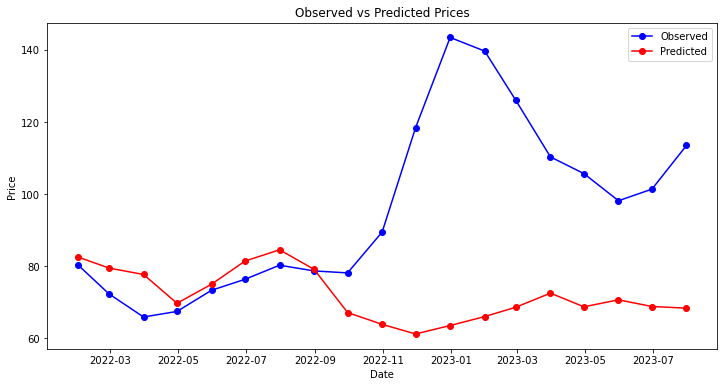

In [117]:
import matplotlib.pyplot as plt

# Assuming `test_original_scale` and `trimmed_predicted_values` are Pandas Series or NumPy arrays

plt.figure(figsize=(12, 6))

# Trim or extend the arrays to have the same length
min_length = min(len(test_original_scale), len(forecasted_values_original_scale))
test_original_scale = test_original_scale.iloc[:min_length]
forecasted_values_original_scale = forecasted_values_original_scale[:min_length]

# Plot the observed values
plt.plot(test_original_scale.index, test_original_scale, label='Observed', marker='o', linestyle='-', color='blue')

# Plot the predicted values
plt.plot(test_original_scale.index, forecasted_values_original_scale, label='Predicted', marker='o', linestyle='-', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Observed vs Predicted Prices')

# Show the plot
plt.show()


In [40]:
#test['Price'].head()

print(test_original_scale)

Date
2021-05-31     56.643947
2021-06-30     55.974329
2021-07-31     58.271876
2021-08-31     67.865850
2021-09-30     63.336414
2021-10-31     82.074646
2021-11-30     81.466738
2021-12-31     79.395160
2022-01-31     80.446912
2022-02-28     72.354942
2022-03-31     65.952726
2022-04-30     67.492457
2022-05-31     73.354257
2022-06-30     76.401411
2022-07-31     80.300338
2022-08-31     78.720813
2022-09-30     78.172500
2022-10-31     89.481099
2022-11-30    118.417817
2022-12-31    143.431726
2023-01-31    139.653758
2023-02-28    125.959524
2023-03-31    110.320873
2023-04-30    105.694129
2023-05-31     98.176230
2023-06-30    101.389000
2023-07-31    113.498844
Freq: M, Name: Price, dtype: float64


In [39]:
print(trimmed_predicted_values)

2021-05-31     68.017509
2021-06-30     71.714922
2021-07-31     84.971195
2021-08-31    104.062009
2021-09-30     90.321016
2021-10-31     72.765633
2021-11-30     85.524627
2021-12-31     83.861494
2022-01-31     70.184310
2022-02-28     68.221391
2022-03-31     75.883934
2022-04-30     71.060799
2022-05-31     82.654330
2022-06-30     84.729137
2022-07-31     82.504269
2022-08-31     75.685334
2022-09-30     59.384875
2022-10-31     61.981897
2022-11-30     71.477139
2022-12-31     84.896345
2023-01-31     78.888183
2023-02-28     85.192010
2023-03-31     86.083568
2023-04-30     72.296723
2023-05-31     70.531605
2023-06-30     83.508421
2023-07-31     78.755590
Freq: M, Name: predicted_mean, dtype: float64


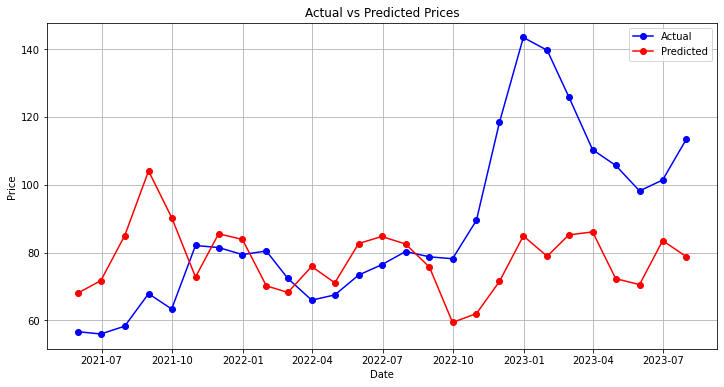

In [119]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Resample the data to weekly frequency
df_weekly = df.resample('W').mean()

# Set frequency explicitly
df_weekly.index.freq = 'W'

# Set up parameters
order = (49,1,49)  # Example order, you may need to adjust this based on your data and analysis
forecast_steps = 5  # Assuming you want to forecast 12 weeks

# Initialize variables to store performance metrics
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

# Set up TimeSeriesSplit for weekly frequency
n_splits = 10  # Number of splits for Time Series Split
tscv = TimeSeriesSplit(n_splits=n_splits)

# Perform time series cross-validation
for train_index, test_index in tscv.split(df_weekly):
    train = df_weekly.iloc[train_index]
    test = df_weekly.iloc[test_index]

    # Fit the ARIMA model on the training data
    model = sm.tsa.ARIMA(train['Price'], order=order)
    results = model.fit()

    # Forecast future values
    forecast_steps = len(test)  # Adjust forecast steps based on the length of the test set
    forecast = results.get_forecast(steps=forecast_steps)

    # Get the predicted values
    predicted_values = forecast.predicted_mean

    # Convert log-transformed values back to original scale
    forecasted_values_original_scale = np.exp(predicted_values)

    # Revert the log transformation of the test set
    test_original_scale = np.exp(test['Price'])

    # Trim the predicted values to match the length of the test set
    trimmed_predicted_values = forecasted_values_original_scale[:len(test)]

    # Evaluate the model using different metrics
    mse = mean_squared_error(test_original_scale, trimmed_predicted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_original_scale, trimmed_predicted_values)
    mape = np.mean(np.abs((test_original_scale - trimmed_predicted_values) / test_original_scale)) * 100

    # Append the metrics to the lists
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

# Calculate the average metrics
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_mae = np.mean(mae_list)
average_mape = np.mean(mape_list)

# Print the average metrics
print('Average Metrics across Folds')
print(f'MSE: {average_mse:.2%}')
print(f'RMSE: {average_rmse:.2%}')
print(f'MAE: {average_mae:.2%}')
print(f'MAPE: {average_mape:.2f}%')


Average Metrics across Folds
MSE: 58906.28%
RMSE: 2286.37%
MAE: 1725.83%
MAPE: 21.46%


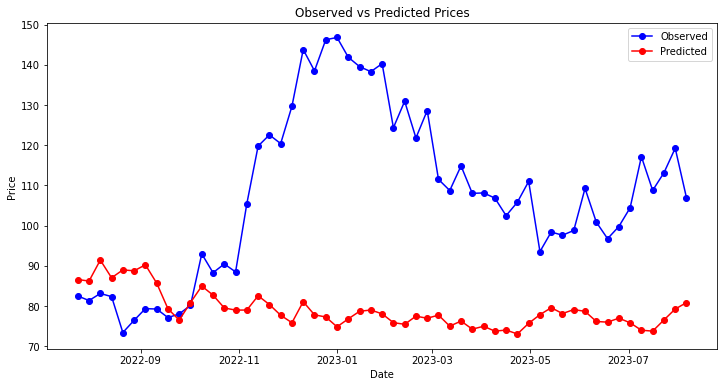

In [120]:
import matplotlib.pyplot as plt

# Assuming `test_original_scale` and `trimmed_predicted_values` are Pandas Series or NumPy arrays

plt.figure(figsize=(12, 6))

# Trim or extend the arrays to have the same length
min_length = min(len(test_original_scale), len(forecasted_values_original_scale))
test_original_scale = test_original_scale.iloc[:min_length]
forecasted_values_original_scale = forecasted_values_original_scale[:min_length]

# Plot the observed values
plt.plot(test_original_scale.index, test_original_scale, label='Observed', marker='o', linestyle='-', color='blue')

# Plot the predicted values
plt.plot(test_original_scale.index, forecasted_values_original_scale, label='Predicted', marker='o', linestyle='-', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Observed vs Predicted Prices')

# Show the plot
plt.show()


In [12]:
###############################################################################################################################